<a href="https://colab.research.google.com/github/Kavin56/Kaiburr-Assesment/blob/main/TASK_5/Kaiburr_TASK_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libs

In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 43.7 MB/s eta 0:00:00


In [ ]:
import re, string, nltk, emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import pandas as pd, numpy as np, re, nltk, matplotlib.pyplot as plt, warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings("ignore")

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
url = "https://files.consumerfinance.gov/ccdb/complaints.csv.zip"
df = pd.read_csv(url, compression="zip")
df.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2020-07-06,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,346XX,NaN,Other,Web,2020-07-06,Closed with explanation,Yes,NaN,3730948
1,2025-10-14,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,NaN,NaN,"EQUIFAX, INC.",TX,75062,NaN,NaN,Web,2025-10-14,In progress,Yes,NaN,16558024
2,2025-10-10,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30341,NaN,NaN,Web,2025-10-10,In progress,Yes,NaN,16507707
3,2025-10-15,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75287,NaN,NaN,Web,2025-10-15,In progress,Yes,NaN,16593757
4,2025-10-03,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,MS,38751,NaN,NaN,Web,2025-10-03,In progress,Yes,NaN,16359589


In [ ]:
df = df.rename(columns=lambda x: x.strip().lower())
df = df[["product", "consumer complaint narrative"]].dropna()

categories = [
    "Credit reporting, repair, or other",
    "Debt collection",
    "Consumer Loan",
    "Mortgage"
]

df = df[df["product"].isin(categories)]
df = df.rename(columns={"consumer complaint narrative": "text"}).sample(frac=1, random_state=42)

print(f"Filtered dataset size: {len(df)}")
print(df["product"].value_counts(), "\n")

Filtered dataset size: 515519
product
Debt collection    371255
Mortgage           134803
Consumer Loan        9461
Name: count, dtype: int64 



In [ ]:
le = LabelEncoder()
df["label"] = le.fit_transform(df["product"])

In [ ]:
import re, string, emoji, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download NLTK dependencies
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")

# Initialize objects
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Add extra common or dataset-specific stopwords
custom_stopwords = {
    "xxxx", "xx", "na", "nan", "n/a", "account", "creditor", "loan", "report",
    "complaint", "consumer", "finance", "company"
}
stop_words |= custom_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Text Cleaning

In [ ]:
# ------------------------------------------------------------
# 🧹 Advanced Text Cleaning Function
# ------------------------------------------------------------

def clean_text_advanced(text):
    """
    Cleans and normalizes consumer complaint text.
    Steps:
    1️⃣ Lowercasing
    2️⃣ Removing URLs, emails, numbers, HTML tags
    3️⃣ Expanding contractions (can't → cannot)
    4️⃣ Removing punctuation, emojis, and extra spaces
    5️⃣ Lemmatizing + removing stopwords
    """

    # 1️⃣ Convert to lowercase
    text = str(text).lower()

    # 2️⃣ Remove URLs, emails, HTML tags, and numbers
    text = re.sub(r"http\S+|www\S+|https\S+", " ", text)
    text = re.sub(r"\S*@\S*\s?", " ", text)
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"\d+", " ", text)

    # 3️⃣ Expand common contractions
    contractions = {
        "can't": "cannot", "won't": "will not", "n't": " not", "'re": " are",
        "'s": " is", "'d": " would", "'ll": " will", "'t": " not", "'ve": " have", "'m": " am"
    }
    for k, v in contractions.items():
        text = text.replace(k, v)

    # 4️⃣ Remove emojis and punctuation
    text = emoji.replace_emoji(text, replace=' ')
    text = text.translate(str.maketrans("", "", string.punctuation))

    # 5️⃣ Tokenize words
    tokens = word_tokenize(text)

    # 6️⃣ Lemmatize + remove stopwords and short tokens
    clean_tokens = [
        lemmatizer.lemmatize(tok) for tok in tokens
        if tok not in stop_words and len(tok) > 2
    ]

    # 7️⃣ Join back into single string
    return " ".join(clean_tokens).strip()


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
try:
    from nltk.tokenize import word_tokenize
    nltk.data.find('tokenizers/punkt')
    tokenizer = word_tokenize
except LookupError:
    print("⚠️ punkt tokenizer not found, using simple split() instead.")
    tokenizer = lambda x: x.split()

# Update function to use fallback tokenizer
def clean_text_final(text):
    # Use your advanced cleaning steps
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", " ", text)
    text = re.sub(r"\S*@\S*\s?", " ", text)
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"\d+", " ", text)

    contractions = {
        "can't": "cannot", "won't": "will not", "n't": " not", "'re": " are",
        "'s": " is", "'d": " would", "'ll": " will", "'t": " not",
        "'ve": " have", "'m": " am"
    }
    for k, v in contractions.items():
        text = text.replace(k, v)

    text = emoji.replace_emoji(text, replace=' ')
    text = text.translate(str.maketrans("", "", string.punctuation))

    tokens = tokenizer(text)
    clean_tokens = [lemmatizer.lemmatize(tok) for tok in tokens if tok not in stop_words and len(tok) > 2]
    return " ".join(clean_tokens).strip()

# Apply cleaning
print("🔄 Cleaning text (this may take a minute)...")
df["clean_text"] = df["text"].apply(clean_text_final)

# Show sample results
print(df[["text", "clean_text"]].sample(3, random_state=42))

🔄 Cleaning text (this may take a minute)...
                                                      text  \
3856825  I think FCRA 605B requires us to remove any in...   
299188   They called me at XXXX XXXX while i am laying ...   
897661   National Credit System is trying to collect de...   

                                                clean_text  
3856825  think fcra requires remove incorrect account c...  
299188   called laying hospital transferred make paymen...  
897661   national credit system trying collect debit ow...  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # unigrams + bigrams
X = tfidf.fit_transform(df["clean_text"])
y = df["label"]

print("✅ TF-IDF vectorization completed. Feature matrix shape:", X.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Train set: {X_train.shape[0]} samples, Test set: {X_test.shape[0]} samples")


✅ TF-IDF vectorization completed. Feature matrix shape: (515519, 5000)
✅ Train set: 412415 samples, Test set: 103104 samples


# NN

## RNN

Starting RNN model training...
Epoch 1/5
10311/10311 ━━━━━━━━━━━━━━━━━━━━ 118s 11ms/step - accuracy: 0.8983 - loss: 0.3132 - val_accuracy: 0.9440 - val_loss: 0.2207
Epoch 2/5
10311/10311 ━━━━━━━━━━━━━━━━━━━━ 106s 10ms/step - accuracy: 0.9378 - loss: 0.2230 - val_accuracy: 0.8950 - val_loss: 0.3018
Epoch 3/5
10311/10311 ━━━━━━━━━━━━━━━━━━━━ 111s 11ms/step - accuracy: 0.9116 - loss: 0.2712 - val_accuracy: 0.9012 - val_loss: 0.2837
Epoch 4/5
10311/10311 ━━━━━━━━━━━━━━━━━━━━ 106s 10ms/step - accuracy: 0.9337 - loss: 0.2279 - val_accuracy: 0.9444 - val_loss: 0.1953
Epoch 5/5
10311/10311 ━━━━━━━━━━━━━━━━━━━━ 102s 10ms/step - accuracy: 0.9422 - loss: 0.1919 - val_accuracy: 0.9444 - val_loss: 0.2166

🏆 RNN Model Accuracy: 0.9433
3222/3222 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step

📈 Classification Report:

                 precision    recall  f1-score   support

  Consumer Loan       0.48      0.02      0.03      1892
Debt collection       0.95      0.98      0.96     74251
       Mortgage       0.94 

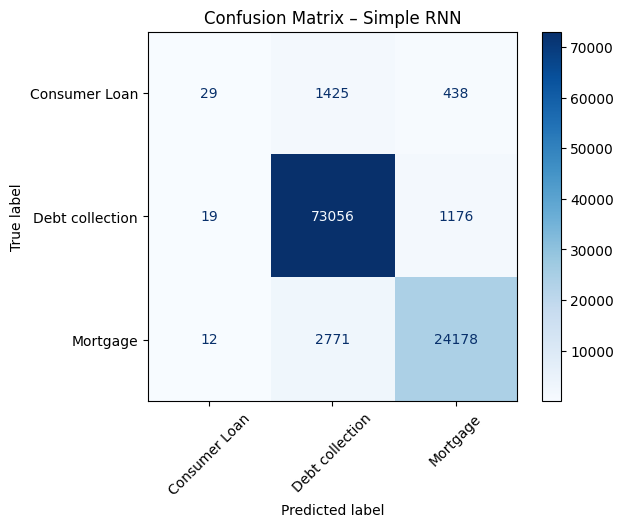

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Since RNNs work with sequences, we need to tokenize and pad the text data.
# We'll use the 'clean_text' column from the dataframe.

# Parameters for tokenization and padding
max_words = 5000  # Maximum number of words to keep
maxlen = 100  # Maximum length of sequences

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df["clean_text"])
sequences = tokenizer.texts_to_sequences(df["clean_text"])

# Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# Split data for RNN
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(
    padded_sequences, df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

# Build the RNN model
rnn_model = Sequential([
    Embedding(max_words, 64, input_length=maxlen),
    SimpleRNN(64),
    Dense(len(le.classes_), activation='softmax') # Output layer with number of classes
])

# Compile the model
rnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
print("Starting RNN model training...")
history = rnn_model.fit(X_train_rnn, y_train_rnn,
                        epochs=5,
                        batch_size=32,
                        validation_split=0.2)

# Evaluate the model
loss, accuracy = rnn_model.evaluate(X_test_rnn, y_test_rnn, verbose=0)
print(f"\n🏆 RNN Model Accuracy: {accuracy:.4f}")

# Predict and display classification report
y_pred_rnn = np.argmax(rnn_model.predict(X_test_rnn), axis=-1)
print("\n📈 Classification Report:\n")
print(classification_report(y_test_rnn, y_pred_rnn, target_names=le.classes_))

# Confusion Matrix
cm_rnn = confusion_matrix(y_test_rnn, y_pred_rnn)
ConfusionMatrixDisplay(confusion_matrix=cm_rnn, display_labels=le.classes_).plot(
    cmap="Blues", xticks_rotation=45
)
plt.title("Confusion Matrix – Simple RNN")
plt.show()

## BiLSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Parameters for tokenization and padding
max_words = 5000  # Maximum number of words to keep
maxlen = 100      # Maximum length of sequences

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df["clean_text"])
sequences = tokenizer.texts_to_sequences(df["clean_text"])

# Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# Split data for BiLSTM
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

# Build the BiLSTM model
bilstm_model = Sequential([
    Embedding(max_words, 64, input_length=maxlen),
    Bidirectional(LSTM(64)),
    Dense(len(le.classes_), activation='softmax')  # Output layer with number of classes
])

# Compile the model
bilstm_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Train the model
print("Starting BiLSTM model training...")
history = bilstm_model.fit(X_train, y_train,
                           epochs=5,
                           batch_size=32,
                           validation_split=0.2)

# Evaluate the model
loss, accuracy = bilstm_model.evaluate(X_test, y_test, verbose=0)
print(f"\n🏆 BiLSTM Model Accuracy: {accuracy:.4f}")

# Predict and display classification report
y_pred = np.argmax(bilstm_model.predict(X_test), axis=-1)
print("\n📈 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(
    cmap="Blues", xticks_rotation=45
)
plt.title("Confusion Matrix – BiLSTM")
plt.show()


Starting BiLSTM model training...
Epoch 1/5
10311/10311 ━━━━━━━━━━━━━━━━━━━━ 151s 14ms/step - accuracy: 0.9476 - loss: 0.1702 - val_accuracy: 0.9660 - val_loss: 0.1064
Epoch 2/5
 3659/10311 ━━━━━━━━━━━━━━━━━━━━ 1:23 13ms/step - accuracy: 0.9682 - loss: 0.1005

# TR

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize model
lr_model = LogisticRegression(max_iter=1000)

# Train
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"🏆 Logistic Regression Accuracy: {acc:.4f}\n")

# Classification Report
print("📈 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(
    cmap="Blues", xticks_rotation=45
)
plt.title("Confusion Matrix – Logistic Regression")
plt.show()


In [ ]:
# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {acc:.4f}\n")

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(
    cmap="Blues", xticks_rotation=45
)
plt.title("Confusion Matrix – Random Forest")
plt.show()


In [ ]:
categories = [
    "Credit reporting, repair, or other",
    "Debt collection",
    "Consumer Loan",
    "Mortgage"
]
df = df[df["product"].isin(categories)]
# Display the count of each product category
print(df["product"].value_counts())

In [ ]:
categories = [
    "Credit reporting, repair, or other",
    "Debt collection",
    "Consumer Loan",
    "Mortgage"
]
df = df[df["product"].isin(categories)]
